# Detecting communities in large networks using networkx package

### Exercise 1:

### Step-1: Import the networkx package and setup the environment to initialise communities

In [2]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

### Step-2: Initialise the karate club graph anf find the number of communities

In [3]:
G_karate = nx.karate_club_graph()
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
print(f"The karate club has {len(communities)} communities.")

The karate club has 3 communities.


### Step-3: Define utility functions to assign the communities to nodes and edges

In [4]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [5]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

### Step-4: Visualise the communities by plotting the graph

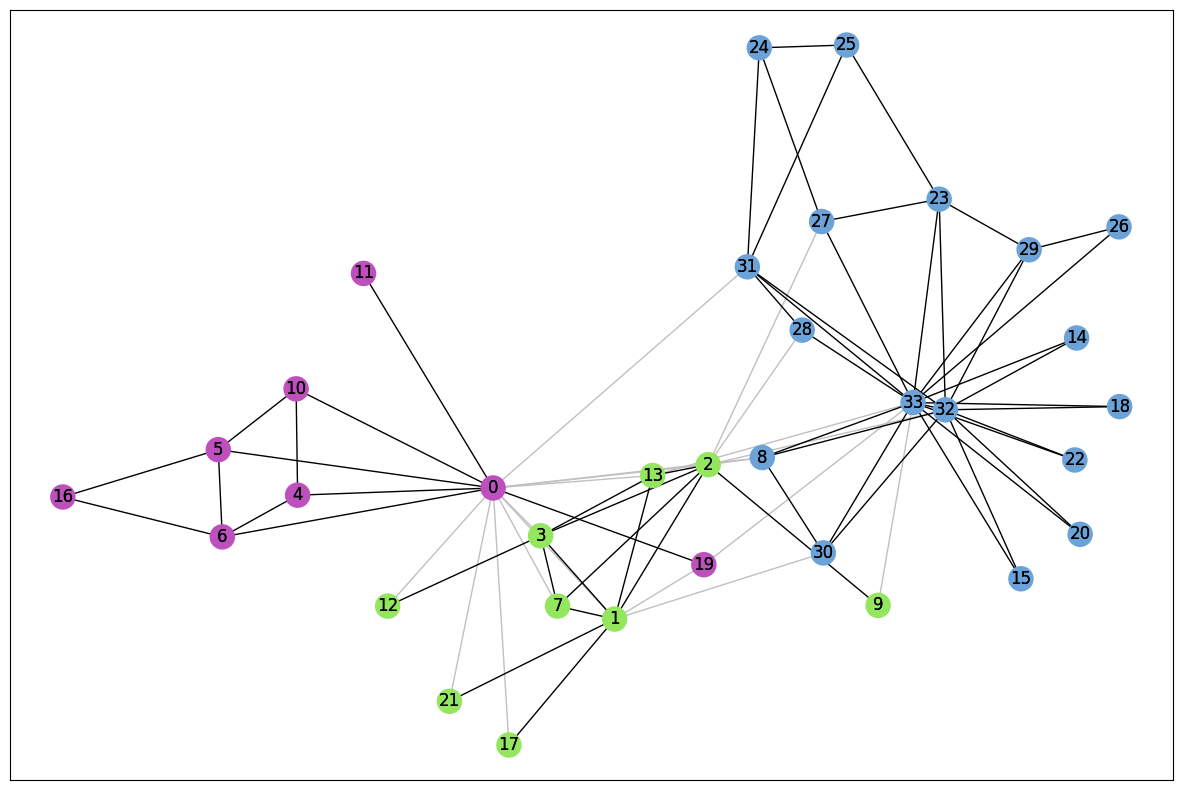

In [6]:
karate_pos = nx.spring_layout(G_karate)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

plt.show()

### Exercise 2:

### Step-1: Import the acebook dataset and find the communities using above steps

In [9]:
data_path = 'facebook_combined.txt'
G_social = nx.read_edgelist(data_path)

In [8]:
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

16

### Step-2: Plot the graph and visualise it

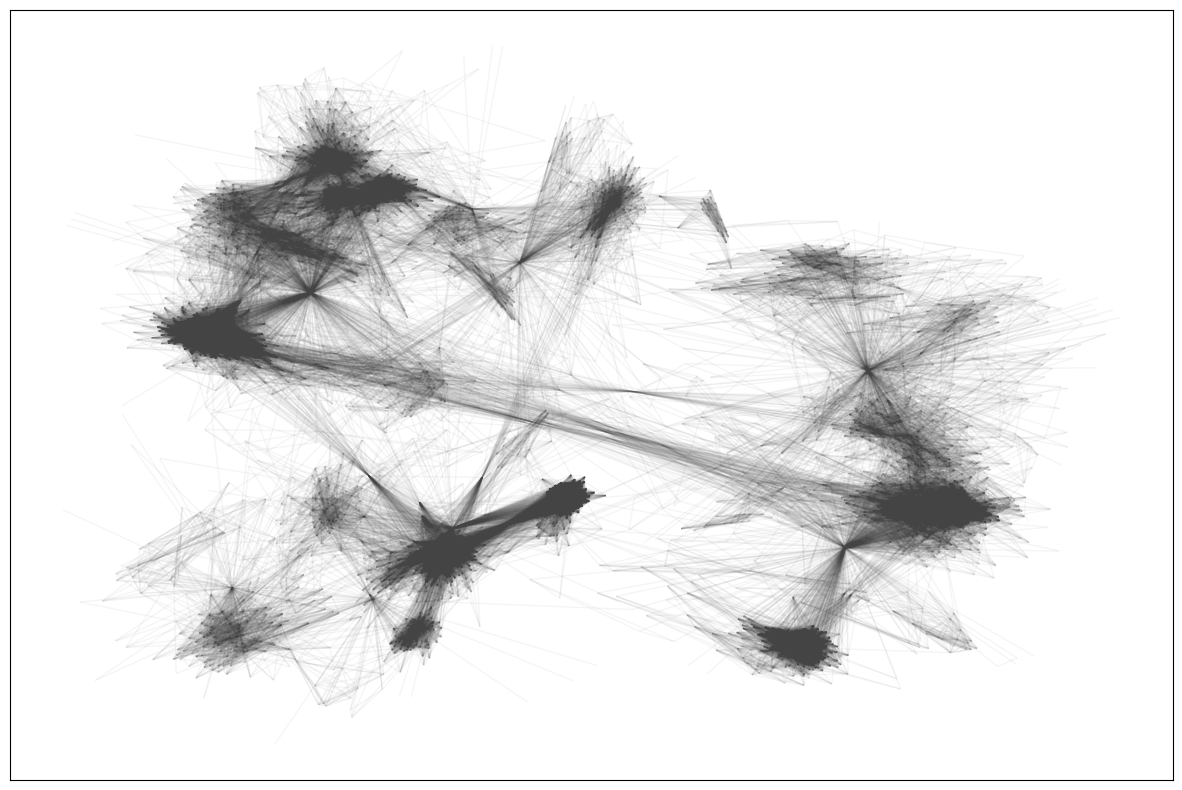

In [11]:
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_social,
    pos=pos,
    node_size=0,
    edge_color="#444444",
    alpha=0.05,
    with_labels=False)

plt.show()

### Step-3: Render the graph using the defined utility functions

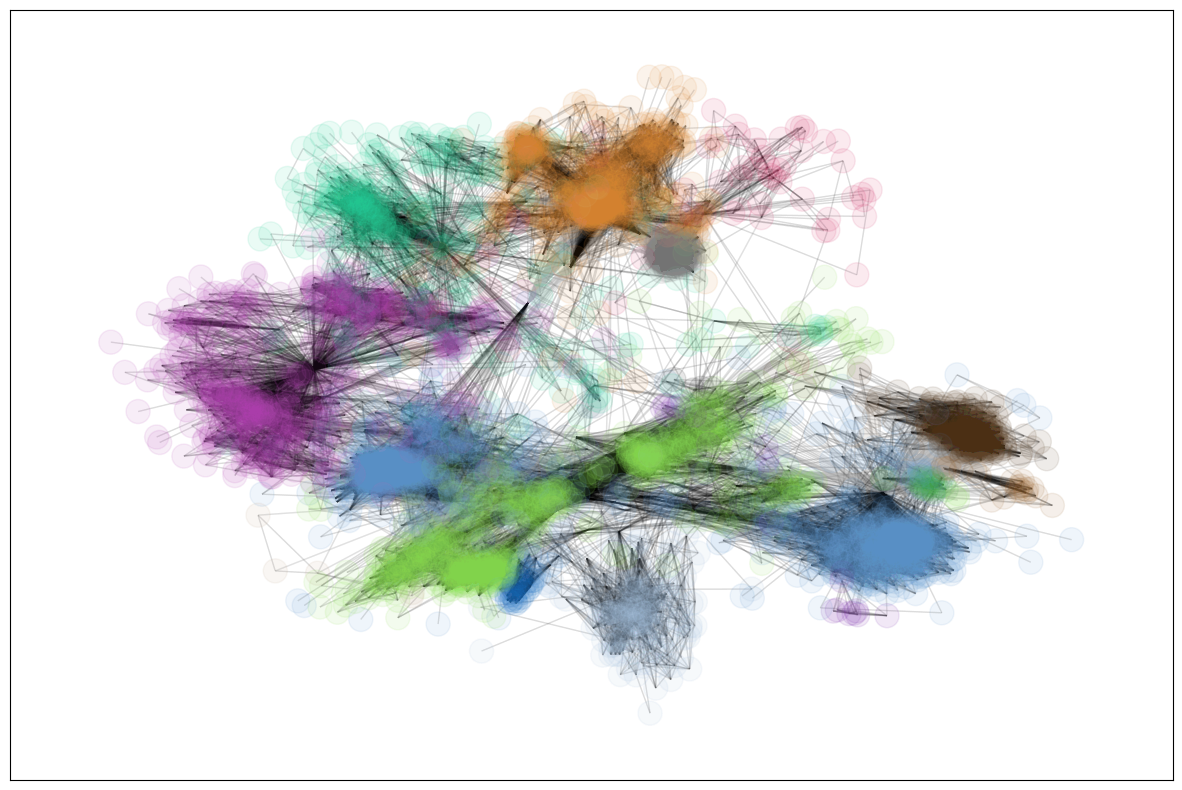

In [10]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)
# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]
# external edges
nx.draw_networkx(
    G_social,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
# internal edges
nx.draw_networkx(
    G_social, pos=pos,
    edgelist=internal,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05,
    with_labels=False)

plt.show()

### Step-4: Apply  community detection

In [11]:
result = nxcom.girvan_newman(G_karate)
communities = next(result)
len(communities)

2

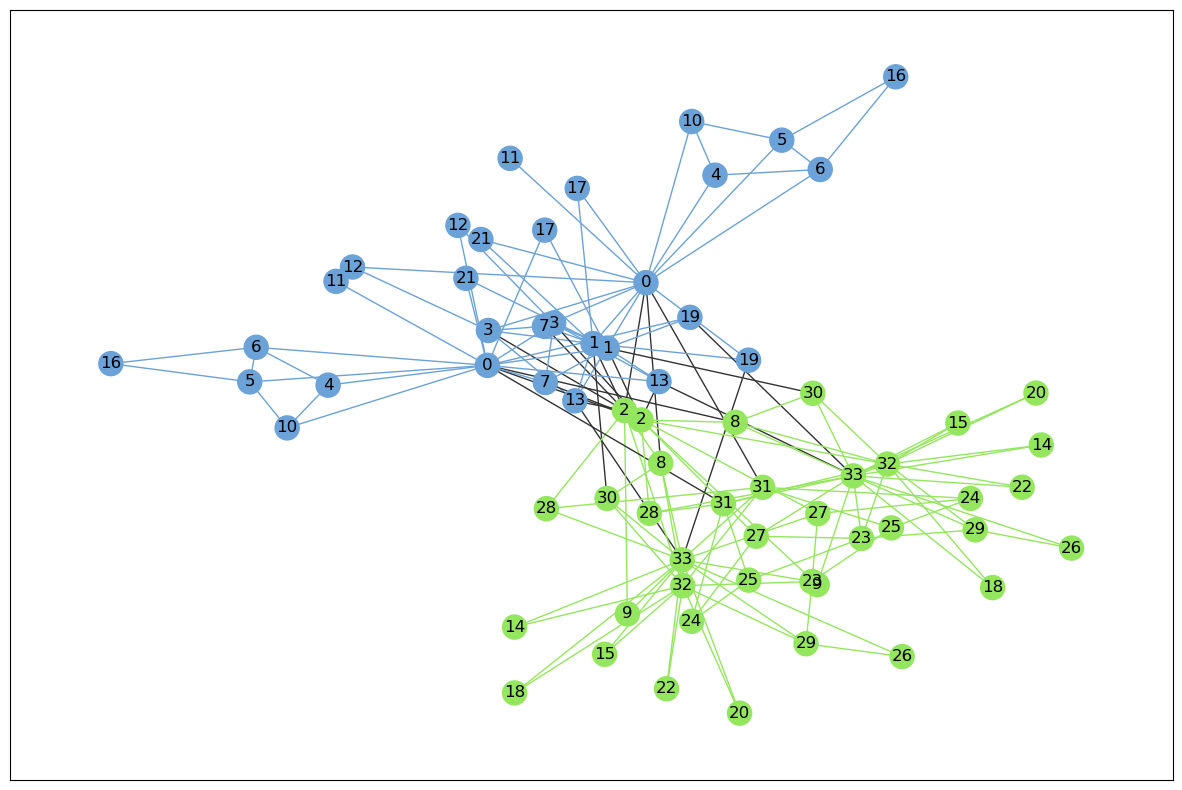

In [13]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)
# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]
karate_pos = nx.spring_layout(G_karate)
# Draw external edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate, pos=karate_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

plt.show()

### Step-5: Find the cliques, k-plex, k-core from the graph

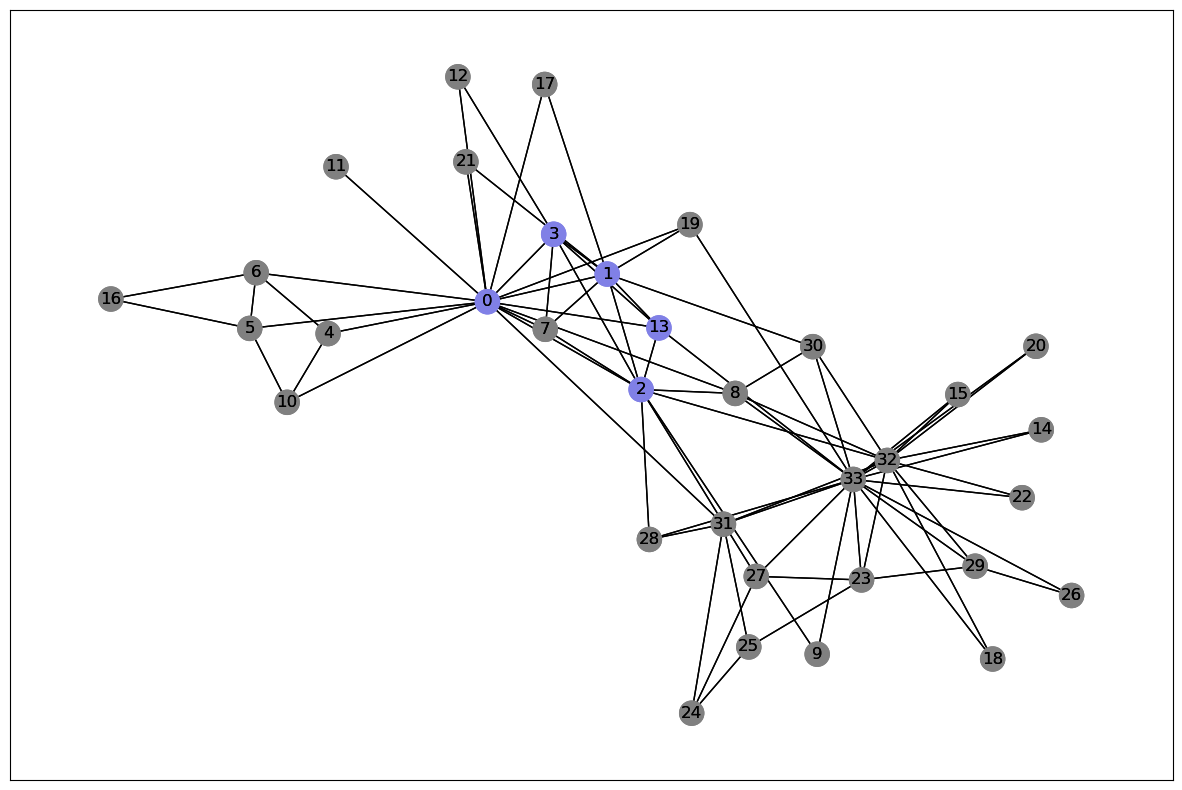

In [15]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
cliques = list(nx.find_cliques(G_karate))
max_clique = max(cliques, key=len)
node_color = [(0.5, 0.5, 0.5) for v in G_karate.nodes()]
for i, v in enumerate(G_karate.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G_karate, node_color=node_color, pos=karate_pos)

plt.show()

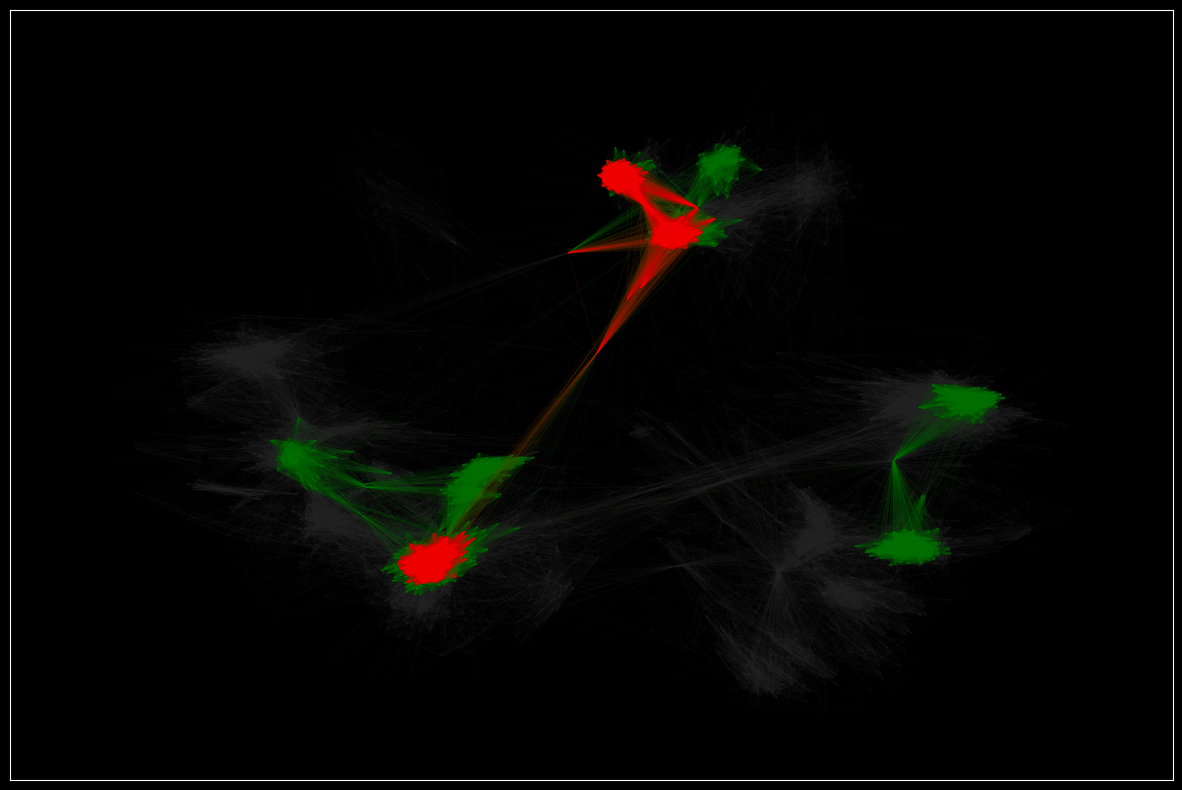

In [16]:
# cores with at least degree 30
G_core_30 = nx.k_core(G_social, 30)
# similarly, with at least degree 60
G_core_60 = nx.k_core(G_social, 60)
# Visualize network and k-cores
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(G_social, k=0.1)
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_30, pos=pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_60, pos=pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)

plt.show()